In [1]:
import pandas as pd 
import os
import numpy as np
import xgboost as xgb
import lightgbm as lgbm
import utils as ut
from collections import defaultdict
import operator 
import plotly as py
import seaborn as sns
from plotly import tools
import plotly.graph_objs as go
from scipy.stats import skew, boxcox

sns.set(color_codes=True)
%pylab inline

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


In [2]:
BIKE_ROOT = os.path.abspath("./data")
TRAIN_FILE = os.path.join(BIKE_ROOT, 'train.csv')
TEST_FILE = os.path.join(BIKE_ROOT, 'test.csv')
SAMPLE_FILE = os.path.join(BIKE_ROOT, 'sampleSubmission.csv')

assert os.path.exists(BIKE_ROOT)
assert os.path.exists(TRAIN_FILE)
assert os.path.exists(TEST_FILE)
assert os.path.exists(SAMPLE_FILE)

In [3]:
tr_te, train_len, test_len = ut.load_files(TRAIN_FILE, TEST_FILE)
tr_te = ut.time_vars_parser(tr_te, var_to_parse = 'datetime')

# add a count_season column using join
by_season = tr_te[tr_te['ix_train'] == 1].groupby('season')[['count']].agg(sum)
by_season.columns = ['count_season']
tr_te = tr_te.join(by_season, on='season')
tr = tr_te.loc[:train_len-1,:]

DONE: data loading
DONE: date parsing


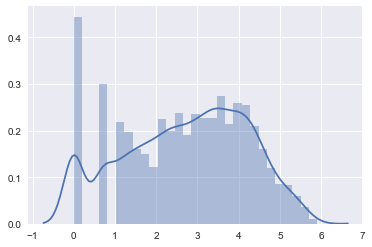

In [4]:
sns.distplot(np.log(tr['casual'].values+1 ));

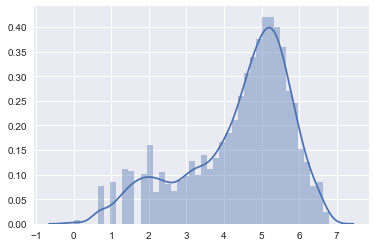

In [5]:
sns.distplot(np.log(tr['registered'].values+1 ));

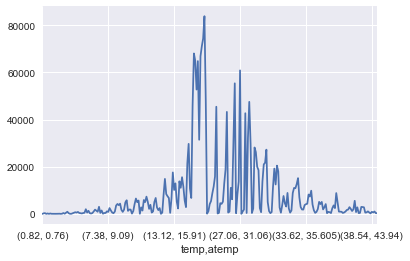

In [6]:
# chilled
tr_te[tr_te['ix_train'] == 1].copy().groupby(['temp', 'atemp'])['count'].agg('sum').plot()

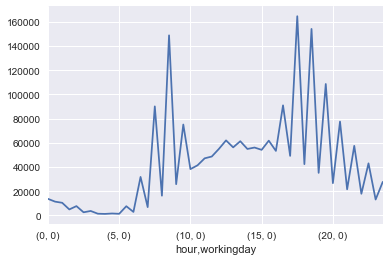

In [7]:
# rush_
tr_te[tr_te['ix_train'] == 1].copy().groupby(['hour', 'workingday'])['count'].agg('sum').plot()

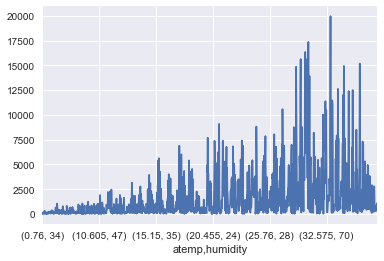

In [8]:
# dry
tr_te[tr_te['ix_train'] == 1].copy().groupby([ 'atemp','humidity'])['count'].agg('sum').plot()